In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [ ]:
hp.info()
hp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
hp.shape

(1460, 81)

In [ ]:
print("Number of Object Columns:", hp.select_dtypes(object).shape[1])
print("Number of Numeric Columns:", hp.select_dtypes(["integer","float"]).shape[1])

Num of Object Columns: 43
Num of Numeric Columns: 38


In [ ]:
#find functiom that has percent of missing values
def missingness_summary(df, print_log=True, sort='descending'):
  percentage_null = df.isnull().sum()*100/df.isnull().count()
  pd.set_option('display.max_rows', None)
  if sort.lower() == 'ascending':
    percentage_null = percentage_null.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    percentage_null = percentage_null.sort_values(ascending=False)  
  if print_log: 
    print(percentage_null)
  
  return pd.Series(percentage_null)


missing = missingness_summary(hp)

poolqc          99.521
miscfeature     96.301
alley           93.767
fence           80.753
fireplacequ     47.260
lotfrontage     17.740
garagecond       5.548
garagetype       5.548
garageyrblt      5.548
garagefinish     5.548
garagequal       5.548
bsmtexposure     2.603
bsmtfintype2     2.603
bsmtfintype1     2.534
bsmtcond         2.534
bsmtqual         2.534
masvnrarea       0.548
masvnrtype       0.548
electrical       0.068
utilities        0.000
yearremodadd     0.000
mssubclass       0.000
foundation       0.000
extercond        0.000
exterqual        0.000
exterior2nd      0.000
exterior1st      0.000
roofmatl         0.000
roofstyle        0.000
yearbuilt        0.000
lotconfig        0.000
overallcond      0.000
overallqual      0.000
housestyle       0.000
bldgtype         0.000
condition2       0.000
bsmtfinsf1       0.000
mszoning         0.000
lotarea          0.000
street           0.000
condition1       0.000
neighborhood     0.000
lotshape         0.000
landcontour

In [ ]:
# drop columns with more than 15% missing data
hp2 = hp.drop(['poolqc','miscfeature','alley','fence','fireplacequ','lotfrontage'], axis=1)


In [ ]:
# drop any row with missing data
hp3 = hp2.dropna()

hp3.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
firstflrsf       0
secondflrsf      0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual      0
totrmsabvgrd

In [ ]:
print("Num of Object Variables:", hp3.select_dtypes(object).shape[1])
print("Num of Integer Variables:", hp3.select_dtypes("integer").shape[1])
print("Num of Float Variables:", hp3.select_dtypes("float").shape[1])

Num of Object Variables: 38
Num of Integer Variables: 35
Num of Float Variables: 2


(array([ 91., 676., 358., 133.,  52.,  17.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <a list of 10 Patch objects>)

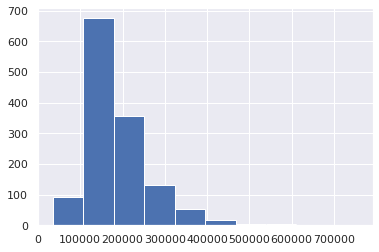

In [ ]:
plt.hist(hp3['saleprice'])

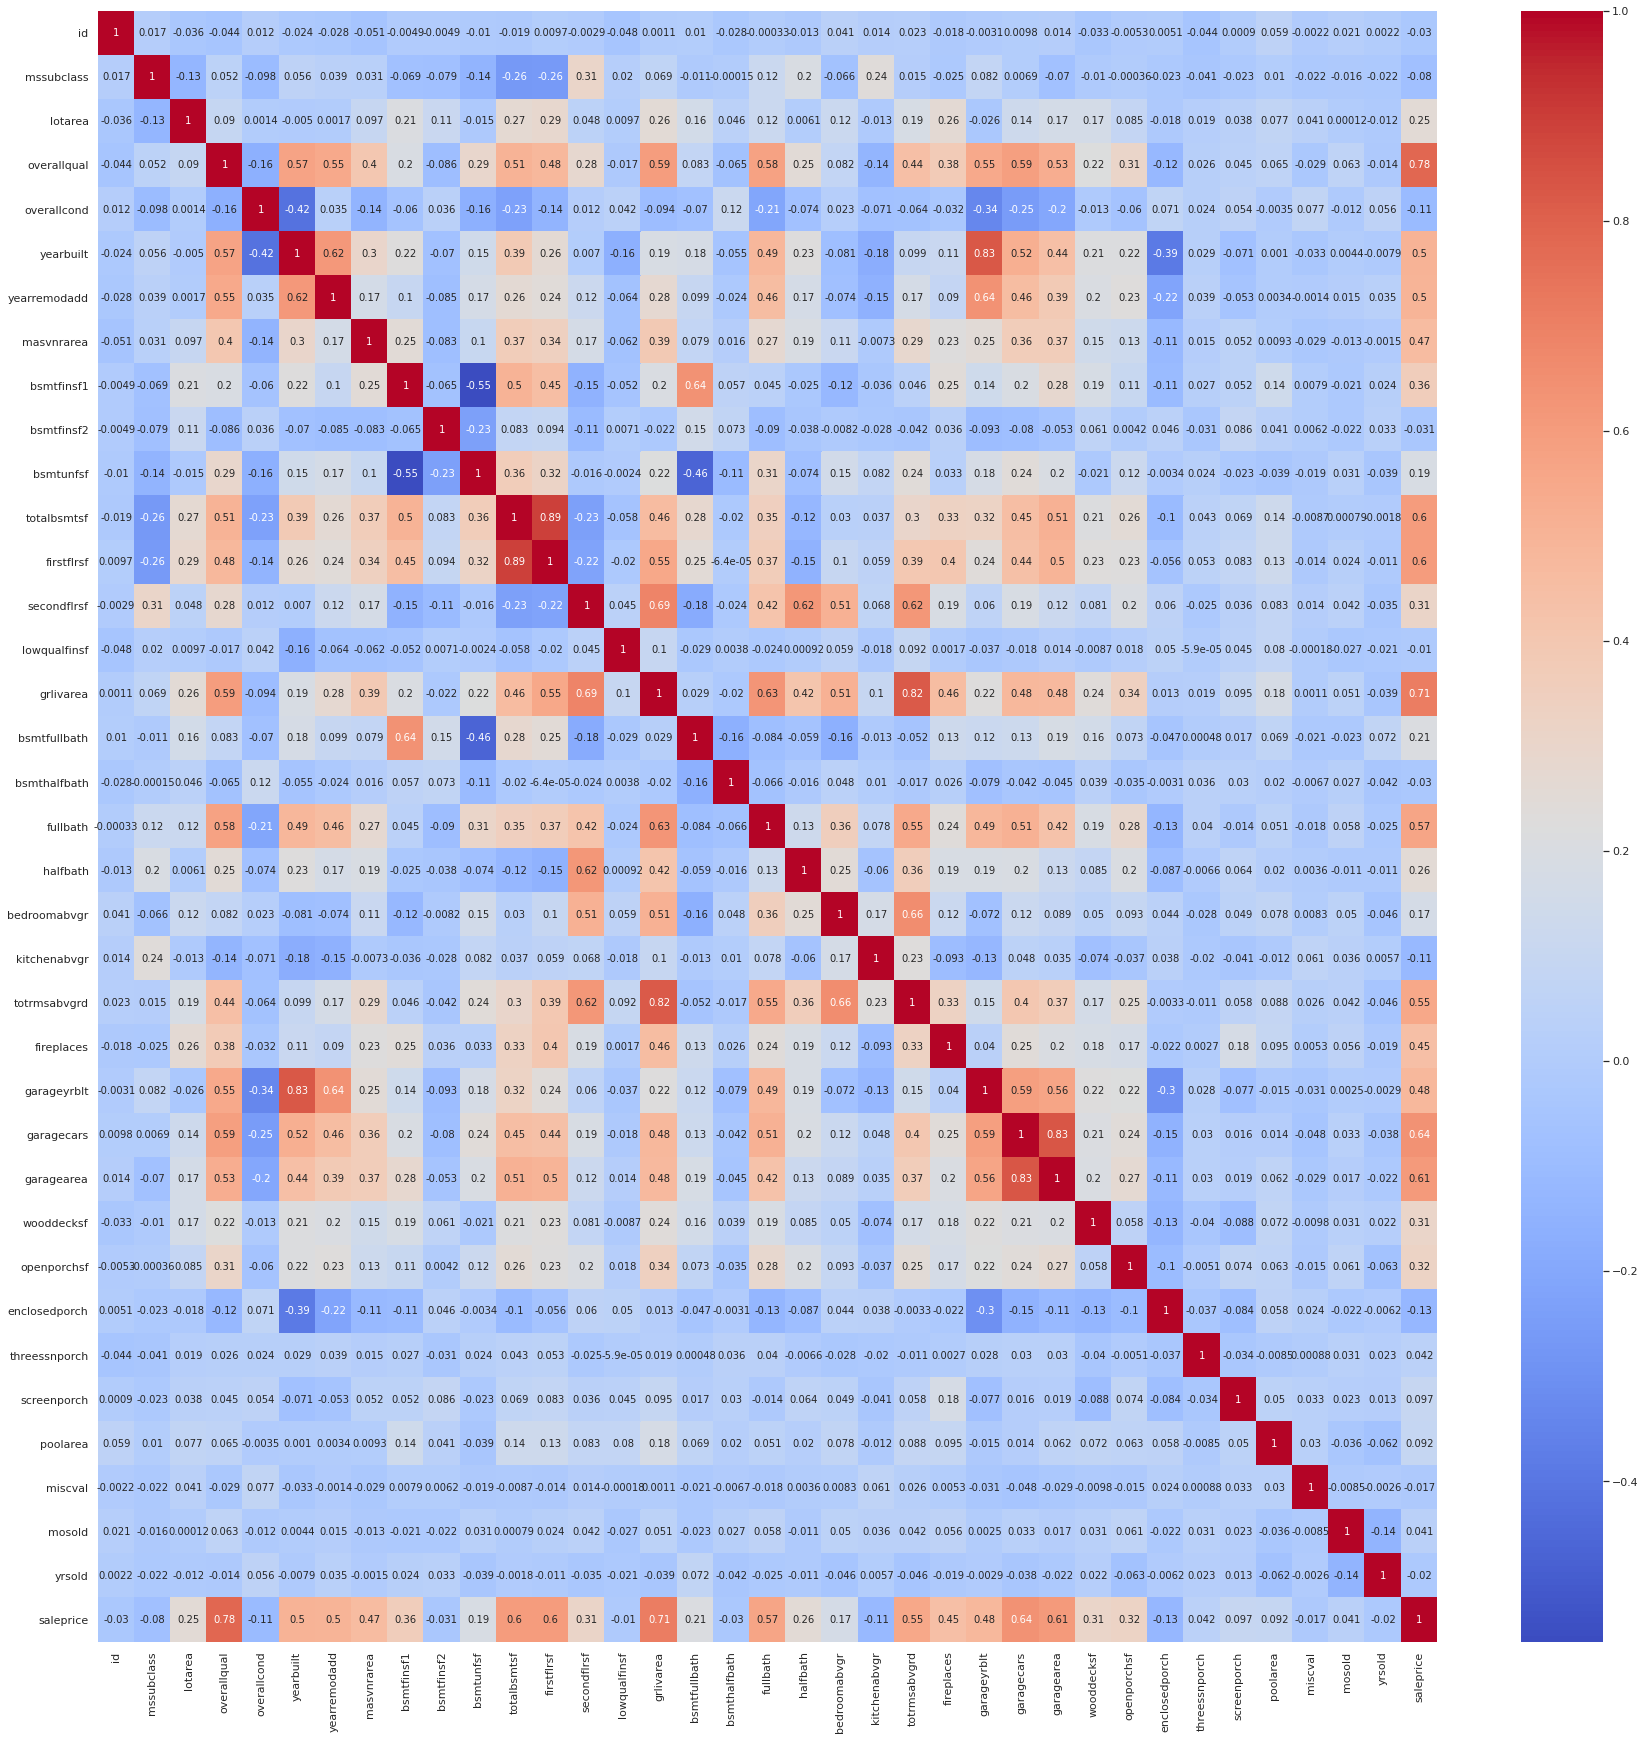

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(hp3.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
hp3.columns

Index(['id', 'mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional',
       'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars',
       'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf',
       'openporchsf', 'e

In [ ]:
#drop numeric columns that correlate to less the 0.40 of saleprice

hp4 = hp3.drop(['id','mssubclass', 'lotarea', 'bsmtfinsf2', 'bsmtfinsf1', 'bsmtunfsf', 'kitchenabvgr', 
        'halfbath', 'bedroomabvgr','bsmtfullbath', 'bsmthalfbath','secondflrsf', 'lowqualfinsf',
        'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
        'poolarea', 'miscval', 'mosold', 'yrsold'], axis=1)


In [ ]:
hp4.describe(include="O")

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,14,16,4,4,4,5,4,4,4,6,6,4,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1066,1333,829,1206,1337,957,1265,209,1162,1324,1138,657,1037,1314,486,475,763,803,1183,620,594,1237,887,402,1176,1318,704,1277,1242,650,1254,852,580,1270,1287,1257,1158,1104


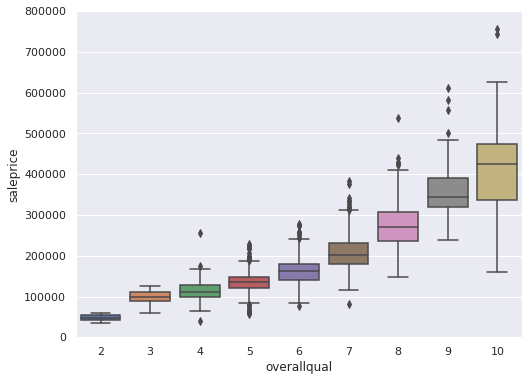

In [ ]:
#box plot overallqual/saleprice
var = 'overallqual'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

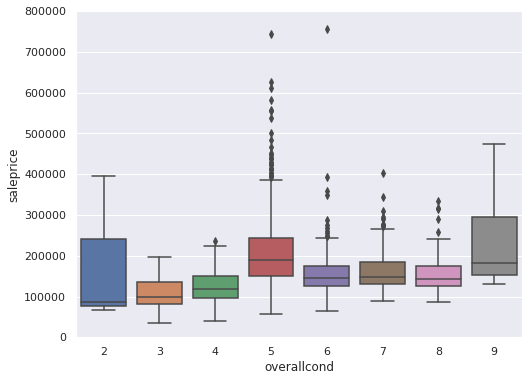

In [ ]:
var = 'overallcond'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

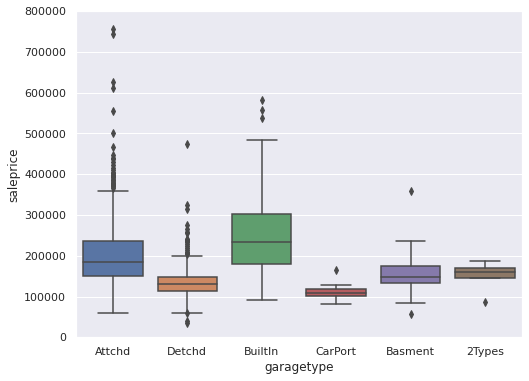

In [ ]:
var = 'garagetype'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

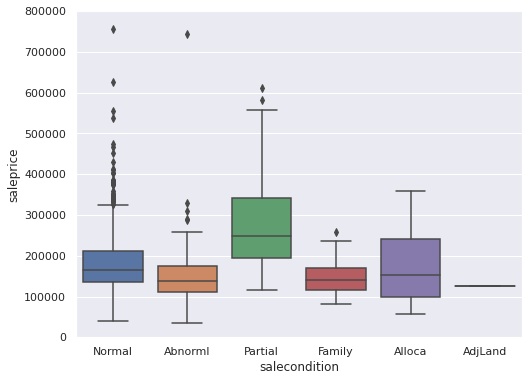

In [ ]:
var = 'salecondition'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

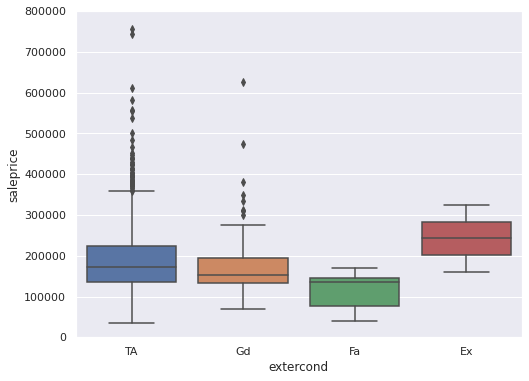

In [ ]:
var = 'extercond'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

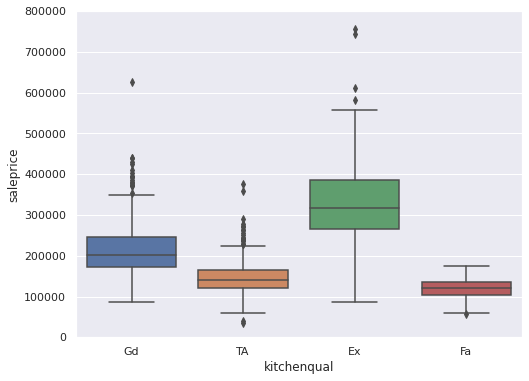

In [ ]:
var = 'kitchenqual'
data = pd.concat([hp4['saleprice'], hp4[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
hp5 = hp4.select_dtypes(np.number)
hp5.head()


,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,firstflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice
0,7,5,2003,2003,196.000,856,856,1710,2,8,0,2003.000,2,548,208500
1,6,8,1976,1976,0.000,1262,1262,1262,2,6,1,1976.000,2,460,181500
2,7,5,2001,2002,162.000,920,920,1786,2,6,1,2001.000,2,608,223500
3,7,5,1915,1970,0.000,756,961,1717,1,7,1,1998.000,3,642,140000
4,8,5,2000,2000,350.000,1145,1145,2198,2,9,1,2000.000,3,836,250000


In [ ]:
hp6 = hp5.drop(['overallcond', 'yearremodadd', 'firstflrsf', 'garageyrblt', 'garagecars'], axis=1)
hp6.head()

,overallqual,yearbuilt,masvnrarea,totalbsmtsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garagearea,saleprice
0,7,2003,196.000,856,1710,2,8,0,548,208500
1,6,1976,0.000,1262,1262,2,6,1,460,181500
2,7,2001,162.000,920,1786,2,6,1,608,223500
3,7,1915,0.000,756,1717,1,7,1,642,140000
4,8,2000,350.000,1145,2198,2,9,1,836,250000


In [ ]:
hp7 = pd.get_dummies(data=hp6, columns=['overallqual','fullbath','totrmsabvgrd', 'fireplaces'], drop_first=True)
hp7.head()

,yearbuilt,masvnrarea,totalbsmtsf,grlivarea,garagearea,saleprice,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,overallqual_9,overallqual_10,fullbath_1,fullbath_2,fullbath_3,totrmsabvgrd_4,totrmsabvgrd_5,totrmsabvgrd_6,totrmsabvgrd_7,totrmsabvgrd_8,totrmsabvgrd_9,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,fireplaces_1,fireplaces_2,fireplaces_3
0,2003,196.000,856,1710,548,208500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1976,0.000,1262,1262,460,181500,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2001,162.000,920,1786,608,223500,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1915,0.000,756,1717,642,140000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,2000,350.000,1145,2198,836,250000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
hp7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearbuilt        1338 non-null   int64  
 1   masvnrarea       1338 non-null   float64
 2   totalbsmtsf      1338 non-null   int64  
 3   grlivarea        1338 non-null   int64  
 4   garagearea       1338 non-null   int64  
 5   saleprice        1338 non-null   int64  
 6   overallqual_3    1338 non-null   uint8  
 7   overallqual_4    1338 non-null   uint8  
 8   overallqual_5    1338 non-null   uint8  
 9   overallqual_6    1338 non-null   uint8  
 10  overallqual_7    1338 non-null   uint8  
 11  overallqual_8    1338 non-null   uint8  
 12  overallqual_9    1338 non-null   uint8  
 13  overallqual_10   1338 non-null   uint8  
 14  fullbath_1       1338 non-null   uint8  
 15  fullbath_2       1338 non-null   uint8  
 16  fullbath_3       1338 non-null   uint8  
 17  totrmsabvgrd_4

In [ ]:
from sklearn.model_selection import train_test_split

X = hp7.drop('saleprice', axis=1)
y = hp7['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

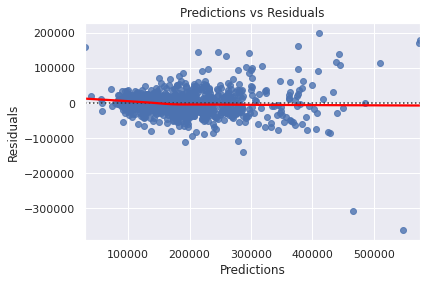

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy import stats

linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
res = y_train - pred

sns.residplot(pred, res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions vs Residuals')
plt.show()



In [ ]:
print('bartlett statistics: {}'.format(stats.bartlett(res, pred)))
print('levene statistics: {}'.format(stats.levene(res, pred)))

bartlett statistics: BartlettResult(statistic=525.9634702448776, pvalue=2.133654232573023e-116)
levene statistics: LeveneResult(statistic=293.6560687106162, pvalue=8.775807246303495e-62)


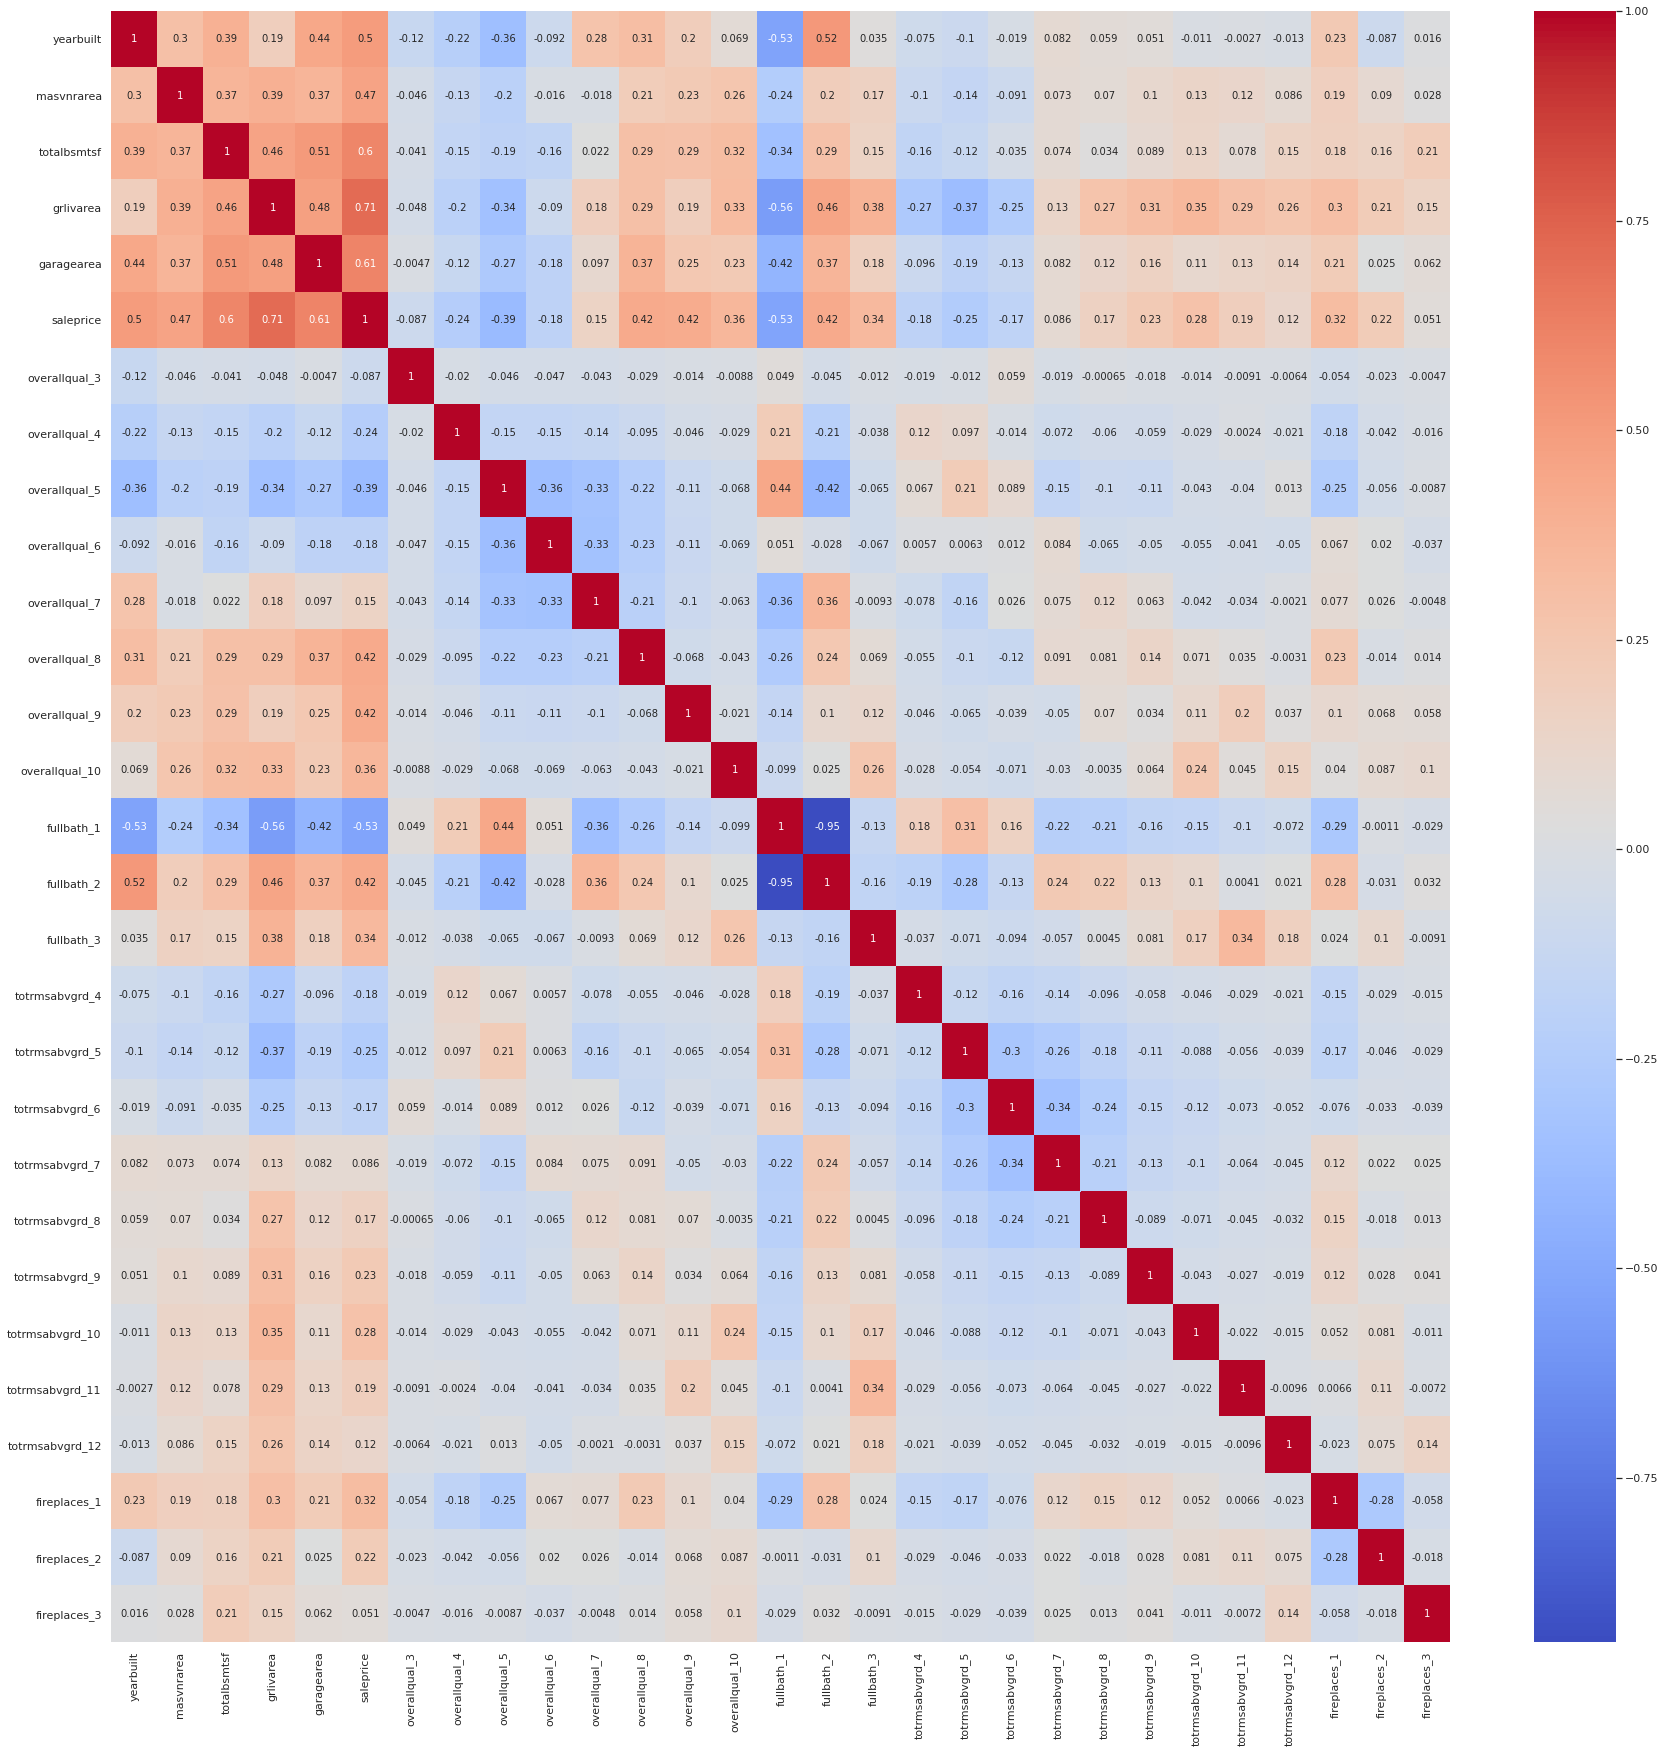

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(hp7.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

None of our features have correltaions of great than 0.71 to the outcome variable. Let's check for multicollinearity with VIF next. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_constant = add_constant(X)
vif = pd.Series([variance_inflation_factor(X_train_constant.values, i) 
  for i in range (X_train_constant.shape[1])], index=X_train_constant.columns).sort_values(ascending=False)
vif

const             10492.694
overallqual_6       149.035
overallqual_5       146.601
overallqual_7       137.520
overallqual_8        84.787
fullbath_2           46.355
fullbath_1           45.550
overallqual_4        43.110
totrmsabvgrd_6       26.155
overallqual_9        25.238
totrmsabvgrd_7       24.183
totrmsabvgrd_5       19.328
totrmsabvgrd_8       16.422
overallqual_10       11.260
totrmsabvgrd_9        8.261
totrmsabvgrd_4        7.566
totrmsabvgrd_10       6.189
grlivarea             5.697
overallqual_3         5.461
fullbath_3            5.310
totrmsabvgrd_11       3.466
totrmsabvgrd_12       2.355
yearbuilt             2.233
totalbsmtsf           1.923
garagearea            1.840
fireplaces_1          1.461
masvnrarea            1.392
fireplaces_2          1.323
fireplaces_3          1.130
dtype: float64

Let's frop the overallqual features. Most of them have VIFs greater than 10. Then we'll rerun VIF and see if we have an more multicollinearity issues. 

In [ ]:
hp6 = hp6.drop('overallqual', axis=1)
hp8 = pd.get_dummies(data=hp6, columns=['fullbath','totrmsabvgrd', 'fireplaces'], drop_first=True)
hp8.head()

,yearbuilt,masvnrarea,totalbsmtsf,grlivarea,garagearea,saleprice,fullbath_1,fullbath_2,fullbath_3,totrmsabvgrd_4,totrmsabvgrd_5,totrmsabvgrd_6,totrmsabvgrd_7,totrmsabvgrd_8,totrmsabvgrd_9,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,fireplaces_1,fireplaces_2,fireplaces_3
0,2003,196.000,856,1710,548,208500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1976,0.000,1262,1262,460,181500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2001,162.000,920,1786,608,223500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1915,0.000,756,1717,642,140000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,2000,350.000,1145,2198,836,250000,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = hp8.drop('saleprice', axis=1)
y = hp8['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

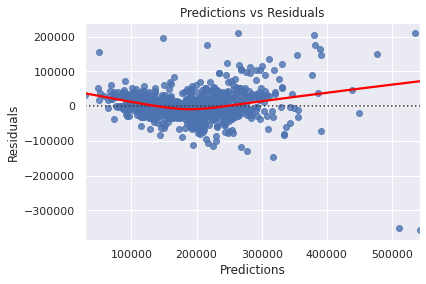

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
res = y_train - pred

sns.residplot(pred, res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions vs Residuals')
plt.show()

In [ ]:
X_train_constant = add_constant(X)
vif = pd.Series([variance_inflation_factor(X_train_constant.values, i) 
  for i in range (X_train_constant.shape[1])], index=X_train_constant.columns).sort_values(ascending=False)
vif

const             8647.375
fullbath_2          43.758
fullbath_1          42.695
totrmsabvgrd_6      24.754
totrmsabvgrd_7      23.020
totrmsabvgrd_5      18.324
totrmsabvgrd_8      15.584
totrmsabvgrd_9       7.902
totrmsabvgrd_4       7.282
totrmsabvgrd_10      5.900
grlivarea            5.129
fullbath_3           5.086
totrmsabvgrd_11      3.271
totrmsabvgrd_12      2.276
yearbuilt            1.871
totalbsmtsf          1.753
garagearea           1.742
fireplaces_1         1.387
masvnrarea           1.336
fireplaces_2         1.292
fireplaces_3         1.126
dtype: float64

Let's drop fullbath and totrmsabvgrd

In [ ]:
hp6 = hp6.drop(['fullbath','totrmsabvgrd'],axis=1)
hp9 = pd.get_dummies(data=hp6, columns=['fireplaces'], drop_first=True)
hp9.head()

,yearbuilt,masvnrarea,totalbsmtsf,grlivarea,garagearea,saleprice,fireplaces_1,fireplaces_2,fireplaces_3
0,2003,196.000,856,1710,548,208500,0,0,0
1,1976,0.000,1262,1262,460,181500,1,0,0
2,2001,162.000,920,1786,608,223500,1,0,0
3,1915,0.000,756,1717,642,140000,1,0,0
4,2000,350.000,1145,2198,836,250000,1,0,0


In [ ]:
X = hp9.drop('saleprice', axis=1)
y = hp9['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

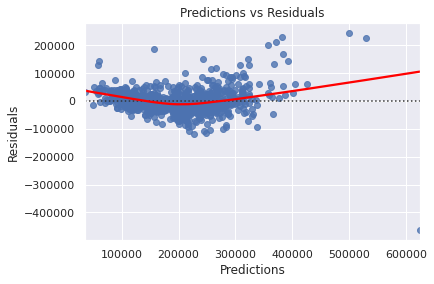

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
res = y_train - pred

sns.residplot(pred, res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions vs Residuals')
plt.show()

In [ ]:
X_train_constant = add_constant(X)
vif = pd.Series([variance_inflation_factor(X_train_constant.values, i) 
  for i in range (X_train_constant.shape[1])], index=X_train_constant.columns).sort_values(ascending=False)
vif

const          5979.945
grlivarea         1.729
garagearea        1.716
totalbsmtsf       1.672
yearbuilt         1.390
fireplaces_1      1.340
masvnrarea        1.311
fireplaces_2      1.272
fireplaces_3      1.091
dtype: float64

We will run the rest of our analysis with these low VIF features. 

In [ ]:
# OLS regression and train/test scores
linear = LinearRegression()
linear.fit(X_train, y_train)

print(f"\nOLS Train R^2: {linear.score(X_train, y_train):.3f}")
print(f"OLS Test R^2: {linear.score(X_test, y_test):.3f}")


OLS Train R^2: 0.750
OLS Test R^2: 0.585


In [ ]:
#ridge regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#ridge regression train/test scores
print(f"\nRidge Train R^2: {ridge.score(X_train, y_train):.3f}")
print(f"Ridge Test R^2: {ridge.score(X_test, y_test):.3f}")


Ridge Train R^2: 0.749
Ridge Test R^2: 0.595


In [ ]:
grid = {"alpha": [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], "max_iter": [1,5,10,30,50,100,1000]}

ridge_cv = GridSearchCV(Ridge(), grid, cv=10)
ridge_cv.fit(X_train, y_train)

print(f"selected alpha: {ridge_cv.best_estimator_.alpha}")
print(f"selected max_iter: {ridge_cv.best_estimator_.max_iter}")

selected alpha: 10
selected max_iter: 1


In [ ]:
#ridge reg tuned to the best hyperparameter
ridge = Ridge(alpha=10, max_iter=1)
ridge.fit(X_train, y_train)

print(f"\nRidge Train R^2: {ridge.score(X_train, y_train):.3f}")
print(f"Ridge Test R^2: {ridge.score(X_test, y_test):.3f}")


Ridge Train R^2: 0.744
Ridge Test R^2: 0.613


In [ ]:
#lasso regression and train/test scores
lasso = Lasso()
lasso.fit(X_train, y_train)

print(f"\nLasso Train R^2: {lasso.score(X_train, y_train):.3f}")
print(f"Lasso Test R^2: {lasso.score(X_test, y_test):.3f}")


Lasso Train R^2: 0.750
Lasso Test R^2: 0.585


In [ ]:
#lasso reg tuning to the best hyperparameter
grid = {"alpha": [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], "max_iter": [1,5,10,30,50,100,1000]}

lasso_cv = GridSearchCV(Lasso(), grid, cv=10)
lasso_cv.fit(X_train, y_train)

print(f"selected alpha: {lasso_cv.best_estimator_.alpha}")
print(f"selected max_iter: {lasso_cv.best_estimator_.max_iter}")

selected alpha: 100
selected max_iter: 30


In [ ]:
#best lasso hyperparameter train/test scores
lasso = Lasso(alpha=100, max_iter=30)
lasso.fit(X_train, y_train)

print(f"\nLasso Train R^2: {lasso.score(X_train, y_train):.3f}")
print(f"Lasso Test R^2: {lasso.score(X_test, y_test):.3f}")


Lasso Train R^2: 0.749
Lasso Test R^2: 0.594


In [ ]:
#elastic net regression and train/test scores
en = ElasticNet()
en.fit(X_train, y_train)

print(f"\nElastic Net Train R^2: {en.score(X_train, y_train):.3f}")
print(f"Elastic Net Test R^2: {en.score(X_test, y_test):.3f}")


Elastic Net Train R^2: 0.728
Elastic Net Test R^2: 0.601


In [ ]:
#elastic net reg tuning to the best hyperparameter
grid = {"alpha": [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], 
        "l1_ratio": np.arange(0.0, 1.0, 0.1),"max_iter": [1,5,10,30,50,100,1000]}

en_cv = GridSearchCV(ElasticNet(), grid, cv=10)
en_cv.fit(X_train, y_train)

print(f"selected alpha: {en_cv.best_estimator_.alpha}")
print(f"selected l1_ratio: {en_cv.best_estimator_.l1_ratio}")
print(f"selected max_iter: {en_cv.best_estimator_.max_iter}")

selected alpha: 0.01
selected l1_ratio: 0.1
selected max_iter: 10


In [ ]:
#best elastic net hyperparameter train/test scores
en = ElasticNet(alpha=.01, l1_ratio=.1, max_iter=10)
en.fit(X_train, y_train)

print(f"\nLasso Train R^2: {en.score(X_train, y_train):.3f}")
print(f"Lasso Test R^2: {en.score(X_test, y_test):.3f}")


Lasso Train R^2: 0.745
Lasso Test R^2: 0.612


Lasso has the best tuned training scores of .749 to Ridge's .744 and Elastic Net's .745. The Lasso model has a R^2 of .594 on the test set. 

#To start this exercise, pick a dataset. It could be one you've worked with before or it could be a new dataset. Then build the best decision tree that you can.

#Now, try to match that with the simplest random forest that you can. For this exercise, measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect, but just go with it.

In [ ]:
# run start_time before your code and then end_time after and do it all in same cell as work
from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.000032


In [ ]:
from sklearn.ensemble import RandomForestRegressor

start_time = datetime.now()
forest = RandomForestRegressor()

forest.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.439863


In [ ]:
print("Train score: ",forest.score(X_train, y_train))
print("Test score: ",forest.score(X_test, y_test))

Train score:  0.9734816204887641
Test score:  0.6854898713773373


In [ ]:
from sklearn.model_selection import GridSearchCV

start_time = datetime.now()
param_grid = {'max_depth' : [10,30,50,100], 'min_samples_split': [30,50,100,200], 'max_features': ['sqrt', .5], 'n_estimators': [10,50,100,300]}

forest = RandomForestRegressor()

forest_grid = GridSearchCV(forest, param_grid=param_grid, scoring='r2', cv=5)

forest_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:55.610195


In [ ]:
print("Best max depth hyperpararmeter: ",forest_grid.best_estimator_.max_depth)
print("Best min sample sizes hyperpararmeter: ",forest_grid.best_estimator_.min_samples_split)
print("Best max features hyperpararmeter: ",forest_grid.best_estimator_.max_features)
print("Best number of trees hyperpararmeter: ",forest_grid.best_estimator_.n_estimators)

Best max depth hyperpararmeter:  30
Best min sample sizes hyperpararmeter:  30
Best max features hyperpararmeter:  0.5
Best number of trees hyperpararmeter:  300


In [ ]:
print("Train score: ",forest_grid.score(X_train, y_train))
print("Test score: ",forest_grid.score(X_test, y_test))

Train score:  0.861892446304614
Test score:  0.6801448261816209


In [ ]:
start_time = datetime.now()
forest = RandomForestRegressor(max_depth=30, min_samples_split=30, max_features=.5, n_estimators=300)

forest.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.624321


In [ ]:
print("Train score: ",forest.score(X_train, y_train))
print("Test score: ",forest.score(X_test, y_test))

Train score:  0.8626589397018886
Test score:  0.6899137767055376


We see that the Random Forest has a better test score (R^2) 0.690 compared to the best regression model's score of 0.594 (Lasso). 

Running the the a Random Forest module with no hyperparemeter tuning lead to about a 0.4 second run time. When we ran CVgrid to find the best hyperparameters that took about 1 min and 56 seconds. There is definitely a trade off in a finely tuned algorithm and run time. 